In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

In [2]:
# Prepare for the training and testing dataset
(X_tr, y_tr), (X_te, y_te) = cifar10.load_data()

X = np.vstack((X_tr, X_te))
y = np.vstack((y_tr, y_te))

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=seed)

X_tr = X_tr.reshape((X_tr.shape[0], np.prod(X_tr.shape[1:])))
X_te = X_te.reshape((X_te.shape[0], np.prod(X_te.shape[1:])))

y_te = y_te.reshape(-1)
y_tr = y_tr.reshape(-1)

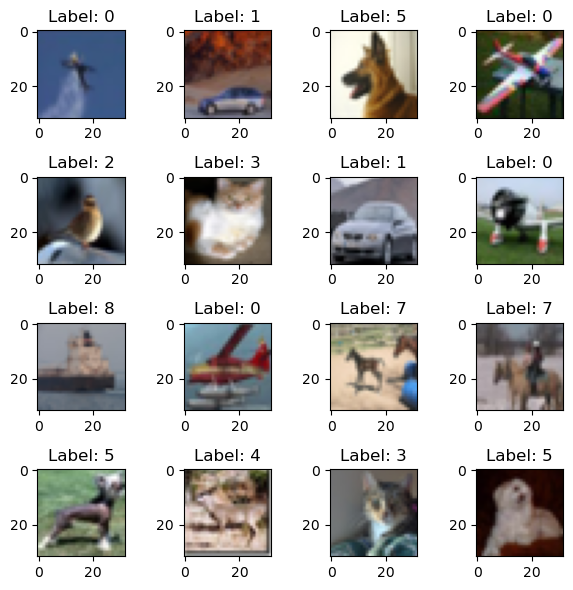

In [3]:
# Display the first 16 images
_, axes = plt.subplots(4, 4, figsize=(6, 6))  

for i in range(4):
    for j in range(4):
        axes[i, j].imshow(X_tr[i * 4 + j].reshape((32, 32, 3)))
        axes[i, j].set_title(f'Label: {y_tr[i * 4 + j]}')

plt.tight_layout()

max_depth=1...
max_depth=2...
max_depth=3...
max_depth=4...
max_depth=5...
max_depth=6...
max_depth=7...
max_depth=8...
max_depth=9...
max_depth=10...
max_depth=11...
max_depth=12...
max_depth=13...
max_depth=14...
max_depth=15...
max_depth=16...
max_depth=17...
max_depth=18...
max_depth=19...
max_depth=20...


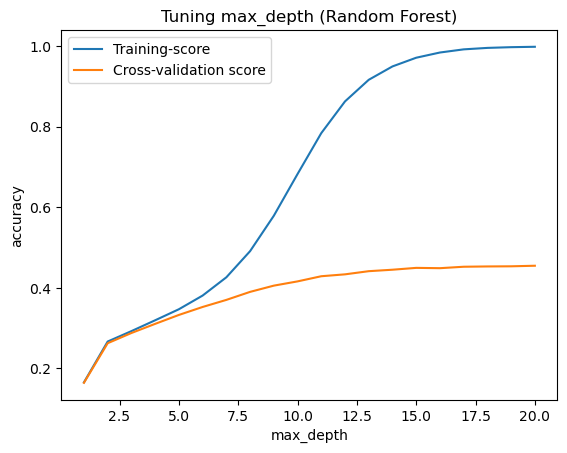

In [4]:
# Tune max_depth parameter
max_depths = list(range(1, 21))
acc_tr = []
acc_cross = []

for max_depth in max_depths:
    print(f'max_depth={max_depth}...')
    clf = RandomForestClassifier(max_depth=max_depth, random_state=seed)
    scores = cross_validate(clf, X_tr, y_tr, cv=5, return_train_score=True, n_jobs=-1)

    acc_tr.append(scores['train_score'].mean())
    acc_cross.append(scores['test_score'].mean())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(max_depths, acc_tr, label='Training-score')
ax.plot(max_depths, acc_cross, label='Cross-validation score')

ax.set_title('Tuning max_depth (Random Forest)')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')

ax.legend();

n_estimators=100...
n_estimators=200...
n_estimators=300...
n_estimators=400...
n_estimators=500...
[0.984011111111111, 0.985511111111111, 0.9857944444444445, 0.9861333333333334, 0.9861611111111112]
[0.44844444444444437, 0.4590222222222223, 0.4629555555555555, 0.4650222222222222, 0.4650888888888889]


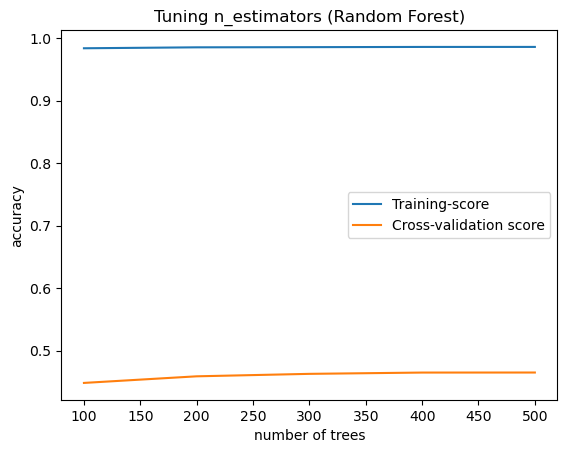

In [6]:
# Tune n_estimators parameters
n_estimators_lst = range(100, 501, 100)
acc_tr = []
acc_cross = []

for n_estimators in n_estimators_lst:
    print(f'n_estimators={n_estimators}...')
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=16, random_state=seed)
    scores = cross_validate(clf, X_tr, y_tr, cv=5, return_train_score=True, n_jobs=-1)

    acc_tr.append(scores['train_score'].mean())
    acc_cross.append(scores['test_score'].mean())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_estimators_lst, acc_tr, label='Training-score')
ax.plot(n_estimators_lst, acc_cross, label='Cross-validation score')

ax.set_title('Tuning n_estimators (Random Forest)')
ax.set_xlabel('number of trees')
ax.set_ylabel('accuracy')

print(acc_tr)
print(acc_cross)

ax.legend();

In [8]:
clf = RandomForestClassifier(n_estimators=300, max_depth=16, random_state=seed)
clf.fit(X_tr, y_tr)
clf.score(X_te, y_te)

0.4712

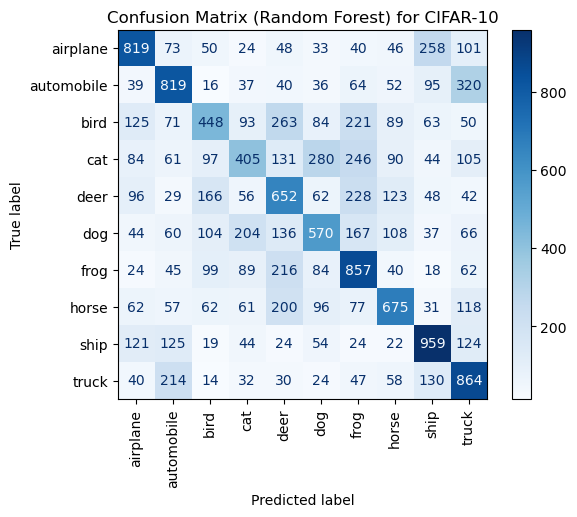

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

disp = ConfusionMatrixDisplay.from_estimator(clf, X_te, y_te, display_labels=labels, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix (Random Forest) for CIFAR-10')
disp.ax_.tick_params(axis='x', labelrotation=90)
plt.show();